In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
import json
font = FontProperties(fname='font/Times-Roman.ttf')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [404]:
# businesses_filename = "/home/lx/DianPing Analysis/data/origin/businesses.txt"
# businesses1_filename = "data/businesses_clean.txt"

# with open(businesses_filename,"r",encoding='utf-8') as businesses_file:
#     with open(businesses1_filename,"w",encoding='utf-8') as businesses1_file:
#         num=1
#         businesses1_file.write(str("ID")+"\t"+str("NAME")+"\t"+str("CITY")+"\t"+str("SCORE")+"\t"+str("FLAVOR")+"\t"+str("ENVIRONMENT")+"\t"+str("SERVICE")+"\t"+str("SHARE")+"\t"+str("LAT")+"\t"+str("LNG")+"\t"+str("STYLE")+"\t"+str("COST")+"\n")
#         for line in businesses_file.readlines():
#             if(num>1):
#                 str1 = "^"
#                 split_index = line.index(str1)
#                 json_line = line[split_index+1:]
#                 dict_line = json.loads(json_line) #json字符串转换成字典
#                 if (len(dict_line)<=2):
#                     continue
#                 ID=dict_line["0"]
#                 NAME=dict_line["1"]
#                 CITY=dict_line["2"]
#                 SCORE=dict_line["3"]
#                 FLAVOR=dict_line["4"]
#                 ENVIRONMENT=dict_line["5"]
#                 SERVICE=dict_line["6"]
#                 SHARE=dict_line["9"]
#                 LAT=dict_line["16"]
#                 LNG=dict_line["17"]
#                 STYLE=dict_line["18"]
#                 COST=dict_line["19"]
#                 businesses1_file.write(str(ID)+"\t"+str(NAME)+"\t"+str(CITY)+"\t"+str(SCORE)+"\t"+str(FLAVOR)+"\t"+str(ENVIRONMENT)+"\t"+str(SERVICE)+"\t"+str(SHARE)+"\t"+str(LAT)+"\t"+str(LNG)+"\t"+str(STYLE)+"\t"+str(COST)+"\n")
#             num+=1
#     businesses1_file.close()
# businesses_file.close()

In [405]:
df0 = pd.read_csv("/home/lx/CAML_Work/restaurant/restaurant_info/data/businesses_label.txt",sep="\t",header=None)
df0.columns =['ID','A','City','C','D','E','F','G','H','category','label']
label = df0[['ID','label']]
df1 = pd.read_csv("data/businesses_clean.txt",sep="\t")
# df1.columns =['ID','NAME','City','C','D','E','F','G','H','category','label']

In [406]:
cost_link = df1[df1['COST']!=0]

In [407]:
cost_link

,ID,NAME,CITY,SCORE,FLAVOR,ENVIRONMENT,SERVICE,SHARE,LAT,LNG,STYLE,COST
8,1729468,名典咖啡语茶(五爱路店),13,3.0,15,15,14,1,31.57318,120.29068,美食,37.0
9,1738246,首义园小吃街,16,3.0,15,10,12,18,30.53567,114.30478,小吃,19.0
53,1879552,武记烧饼,2,3.0,17,12,14,3,39.97207,116.31479,其他小吃,3.0
56,1880668,武砂锅,246,3.5,24,8,10,12,1000.00000,1000.00000,川菜,15.0
58,1881823,韩山城(湖南路总店),5,4.0,20,19,18,259,32.06955,118.77801,韩国料理,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...
338323,2360287,刘一锅筋头巴脑(文府街店),79,4.0,23,16,15,89,45.74267,126.65661,火锅,38.0
338324,2360551,重庆乌江活鱼店(南头店),7,3.0,17,12,12,6,22.53788,113.90934,川菜,50.0
338325,2360683,鸿福人家,17,3.0,16,13,12,0,34.22742,108.91206,川菜,15.0
338326,2360908,卡尔法咖啡酒吧,2,3.0,16,14,15,10,39.89426,116.41821,更多咖啡厅,33.0


In [408]:
link = pd.merge(df1,label,on='ID')

In [409]:
### 
df = pd.read_csv('/home/lx/DianPing Analysis/data/clean/reviews_1.txt', header=None, sep='\t',names = ['userid','itemid','time','rate','flavor','environment','service','content','cost','atmosphere'])
businesses = pd.read_csv('/home/lx/DianPing Analysis/data/clean/businesses_1.txt', header=None, sep='\t',names = ['itemid','city','Score','flavor','environment','service','share','cost','style','atmosphere','tags','areas'])
share = businesses[['itemid','share']]

### 人均消费，分享数，餐厅类型差异


In [410]:
df

,userid,itemid,time,rate,flavor,environment,service,content,cost,atmosphere
0,1877152,1567471,1281275820000,4,3,3,2,非常喜欢这个德国超市，他家各类东东都品牌齐全，不像沃尔玛、家乐福之类只有便宜货。经常能找到一...,-1.0,[]
1,1940911,1567471,1281945600000,4,2,2,2,从这家超市刚在湖南开的时候就开始消费，眼看着这里周边由荒凉变得热闹。人生真是好短。奇怪的是这...,150.0,[]
2,2635301,1567471,1283783880000,3,2,2,1,麦德隆多是大包装的东西。适合三代同堂的家庭采购。这里有卡才能进入，结帐时，同样要出示会员卡。...,-1.0,[]
3,3098121,1567471,1300068120000,5,4,3,3,仓储式购物环境，看着货架上一堆堆的物品，人的购物欲望就被激发起来了！进口食品很多，特别是西点...,100.0,[]
4,3284575,1567471,1261375560000,4,2,2,2,这里大部分都是自家开车来大采购的，而且必须是会员制，但是商品价格很不错，质量也还不错，来这里...,-1.0,[]
...,...,...,...,...,...,...,...,...,...,...
2679731,13930735,587170,1311151860000,3,2,1,1,一直听说味道霸道，一直一直都很想去吃，昨天终于有机会大饱口福了。没有想象中的辣，味道将就可以...,40.0,['朋友聚餐']
2679732,14094033,587170,1311164580000,4,3,1,1,真想不到这个地方的火锅也上了点评网的因为它确实“又旧又难找”。虽说环境就像是大排档，不过味道...,40.0,['随便吃吃']
2679733,15345287,587170,1315536300000,4,4,1,2,我有个同事的家就住在大龙火锅附近，她是那里的常客了！每次去都会把她喜欢吃的菜品一一点一份，最...,40.0,"['情侣约会', '朋友聚餐', '家庭聚会']"
2679734,18712499,587170,1324362120000,4,2,0,1,大龙火锅以前经常去吃，以前去吃觉得黑好吃，最后吃的久了就觉得太辣了，除了辣味就没的其他味了。...,-1.0,['朋友聚餐']


In [411]:
share_counts= df.loc[:,'itemid'].value_counts()

In [412]:
itemid_idx=share_counts.index
itemid_value=share_counts.values

In [413]:

link.describe()

,ID,CITY,SCORE,FLAVOR,ENVIRONMENT,SERVICE,SHARE,LAT,LNG,COST,label
count,3.028700e+04,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000
mean,2.835406e+06,9.209595,3.292518,17.661439,14.913197,14.646515,61.694027,52.408775,138.123017,57.489847,0.714234
std,1.628768e+06,36.691848,1.241237,6.425666,6.422244,5.820239,275.216269,222.778937,214.599116,74.255052,0.451786
min,5.000000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21424.418830,63.451320,0.000000,0.000000
25%,1.926043e+06,1.000000,3.000000,17.000000,12.000000,13.000000,0.000000,31.193195,116.368200,20.000000,0.000000
50%,2.718745e+06,2.000000,4.000000,19.000000,15.000000,15.000000,0.000000,31.281000,118.790310,43.000000,1.000000
75%,4.207074e+06,4.000000,4.000000,21.000000,19.000000,18.000000,26.000000,39.908930,121.457695,66.000000,1.000000
max,5.600600e+06,345.000000,5.000000,32.000000,33.000000,34.000000,10054.000000,1000.000000,21489.752830,2916.000000,1.000000


In [414]:
city4.describe()

,ID,CITY,SCORE,FLAVOR,ENVIRONMENT,SERVICE,SHARE,LAT,LNG,COST,label,FLOW
count,2.242000e+03,2242.0,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000
mean,2.727783e+06,4.0,3.335192,16.687333,14.153434,13.511597,31.393845,46.221169,134.250221,47.766280,0.724799,38.766280
std,1.752236e+06,0.0,1.328531,6.658691,6.627031,5.847771,95.681429,148.443540,134.746945,44.821215,0.446715,31.008049
min,5.166700e+05,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,12.958570,63.451320,0.000000,0.000000,1.000000
25%,5.217498e+05,4.0,3.000000,16.000000,12.000000,12.000000,0.000000,23.114292,113.267900,24.000000,0.000000,14.000000
50%,2.584516e+06,4.0,4.000000,18.000000,15.000000,14.000000,0.000000,23.125680,113.292620,42.000000,1.000000,30.000000
75%,4.282296e+06,4.0,4.000000,21.000000,18.000000,17.000000,22.000000,23.135380,113.326600,58.000000,1.000000,59.000000
max,5.587628e+06,4.0,5.000000,28.000000,31.000000,30.000000,1986.000000,1000.000000,1000.000000,804.000000,1.000000,141.000000


In [415]:
flow = []
for i in range(len(itemid_idx)):
    temp=[]
    temp.append(itemid_idx[i])
    temp.append(itemid_value[i])
    flow.append(temp)

In [416]:
flow = pd.DataFrame(flow)
flow.columns=['ID','FLOW']

In [417]:
link2 = pd.merge(link,flow,on='ID')

In [418]:
link2

,ID,NAME,CITY,SCORE,FLAVOR,ENVIRONMENT,SERVICE,SHARE,LAT,LNG,STYLE,COST,label,FLOW
0,1738246,首义园小吃街,16,3.0,15,10,12,18,30.53567,114.30478,小吃,19.0,1,68
1,1883902,星巴克(东方广场东区店),2,3.5,20,18,17,13,39.90887,116.41225,星巴克,33.0,1,30
2,1888231,绿色楼兰,2,4.0,22,19,18,96,40.03395,116.27479,新疆/清真,63.0,1,91
3,1888990,尹赖仕个旧烧烤鸡脚王(西坝一店),267,3.5,22,9,14,62,25.03139,102.69261,烧烤,33.0,0,21
4,1889089,川亿鸡公煲(飞洲店),1,3.0,16,11,12,13,31.18490,121.44261,川菜,34.0,0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29233,2355304,苏先生海鲜渔庄(源深体育中心店),1,3.5,18,18,13,121,31.23055,121.53597,海鲜,113.0,1,100
29234,2355667,华农大芷园,4,4.0,22,16,15,32,23.15338,113.36597,简餐快餐,5.0,1,69
29235,2357290,得龙茶楼,1,3.5,17,16,14,39,31.16513,121.43027,茶馆,28.0,0,26
29236,2358637,真功夫(临沂沃尔玛店),1,3.0,15,14,14,9,31.20368,121.51824,快餐简餐,26.0,1,52


In [419]:
city1 =  link2[link2['CITY']==1]
city2 =  link2[link2['CITY']==2]
city4 =  link2[link2['CITY']==4]

In [420]:
city4.describe()

,ID,CITY,SCORE,FLAVOR,ENVIRONMENT,SERVICE,SHARE,LAT,LNG,COST,label,FLOW
count,2.242000e+03,2242.0,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000
mean,2.727783e+06,4.0,3.335192,16.687333,14.153434,13.511597,31.393845,46.221169,134.250221,47.766280,0.724799,38.766280
std,1.752236e+06,0.0,1.328531,6.658691,6.627031,5.847771,95.681429,148.443540,134.746945,44.821215,0.446715,31.008049
min,5.166700e+05,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,12.958570,63.451320,0.000000,0.000000,1.000000
25%,5.217498e+05,4.0,3.000000,16.000000,12.000000,12.000000,0.000000,23.114292,113.267900,24.000000,0.000000,14.000000
50%,2.584516e+06,4.0,4.000000,18.000000,15.000000,14.000000,0.000000,23.125680,113.292620,42.000000,1.000000,30.000000
75%,4.282296e+06,4.0,4.000000,21.000000,18.000000,17.000000,22.000000,23.135380,113.326600,58.000000,1.000000,59.000000
max,5.587628e+06,4.0,5.000000,28.000000,31.000000,30.000000,1986.000000,1000.000000,1000.000000,804.000000,1.000000,141.000000


In [421]:
city2.describe() 
# city1.describe()

,ID,CITY,SCORE,FLAVOR,ENVIRONMENT,SERVICE,SHARE,LAT,LNG,COST,label,FLOW
count,8.476000e+03,8476.0,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000
mean,2.777838e+06,2.0,3.247227,18.096154,15.535040,15.243983,58.035984,57.227115,137.163934,62.766871,0.731123,45.025366
std,1.593232e+06,0.0,1.212530,6.324431,6.404945,5.818346,210.370045,270.362280,263.804075,84.294921,0.443402,34.563465
min,5.075390e+05,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,-21424.418830,115.626530,0.000000,0.000000,1.000000
25%,1.923111e+06,2.0,3.000000,17.000000,13.000000,14.000000,0.000000,39.908027,116.341962,26.000000,0.000000,15.000000
50%,2.689204e+06,2.0,3.500000,19.000000,16.000000,16.000000,0.000000,39.934460,116.407165,47.000000,1.000000,36.000000
75%,4.119384e+06,2.0,4.000000,22.000000,19.000000,18.000000,25.000000,39.973600,116.454850,68.000000,1.000000,75.000000
max,5.590041e+06,2.0,5.000000,29.000000,33.000000,32.000000,5492.000000,1000.000000,21489.752830,2916.000000,1.000000,193.000000


In [422]:
city1.describe()

,ID,CITY,SCORE,FLAVOR,ENVIRONMENT,SERVICE,SHARE,LAT,LNG,COST,label,FLOW
count,1.150800e+04,11508.0,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,3.096436e+06,1.0,3.249609,17.127216,14.295707,14.280327,88.604623,44.421780,136.975765,60.521203,0.666840,50.548575
std,1.575184e+06,0.0,1.204235,6.022767,5.986041,5.517392,395.895990,233.290597,226.791014,83.497613,0.471364,39.793787
min,5.000000e+05,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,-21422.699160,94.394530,0.000000,0.000000,1.000000
25%,2.069564e+06,1.0,3.000000,16.000000,12.000000,13.000000,0.000000,31.195170,121.418910,17.000000,0.000000,15.000000
50%,3.046280e+06,1.0,3.500000,18.000000,14.000000,15.000000,0.000000,31.223965,121.460040,40.000000,1.000000,40.000000
75%,4.511322e+06,1.0,4.000000,20.000000,18.000000,17.000000,24.000000,31.250400,121.499705,70.000000,1.000000,92.000000
max,5.589089e+06,1.0,5.000000,30.000000,32.000000,34.000000,10054.000000,1000.000000,21486.490290,1284.000000,1.000000,226.000000


In [423]:
def get_flow_count(city):
    flow = city[['FLOW']]
#     print(flow)
    dic = {}
    for index, row in flow.iterrows():
        line = row['FLOW']
        if line not in dic:
            dic[line] = 1
        else :
            dic[line] += 1
    X,Y = dic.keys(), dic.values()
    return list(X),list(Y)

In [424]:
x0,y0 = get_flow_count(link2)
x1,y1 = get_flow_count(city1)
x2,y2 = get_flow_count(city2)
x4,y4 = get_flow_count(city4)
#
# list(x1)

In [425]:
#### 评论数量

No handles with labels found to put in legend.


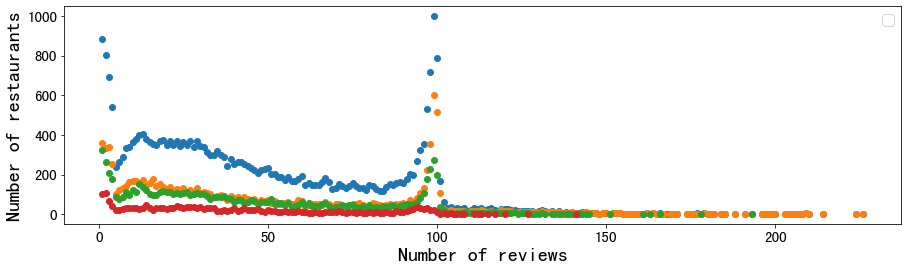

In [426]:
plt.figure(figsize=(15,4))
plt.scatter(x0, y0, marker='o')
plt.scatter(x1, y1, marker='o')
plt.scatter(x2, y2, marker='o')
plt.scatter(x4, y4, marker='o')

plt.xlabel('Number of reviews',fontsize=20)
plt.ylabel('Number of restaurants',fontsize=20)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.show()

# plt.savefig("figure/dianping_category.png",dpi=600)

In [427]:
#### 分享数量

In [428]:
def get_share_count(city):
    flow = city[['SHARE']]
#     print(flow)
    dic = {}
    for index, row in flow.iterrows():
        line = row['SHARE']
        if line not in dic:
            dic[line] = 1
        else :
            dic[line] += 1
    X,Y = dic.keys(), dic.values()
    del(dic[0])
    return list(X),list(Y)

In [429]:
x0,y0 = get_share_count(link2)
x1,y1 = get_share_count(city1)
x2,y2 = get_share_count(city2)
x4,y4 = get_share_count(city4)

No handles with labels found to put in legend.


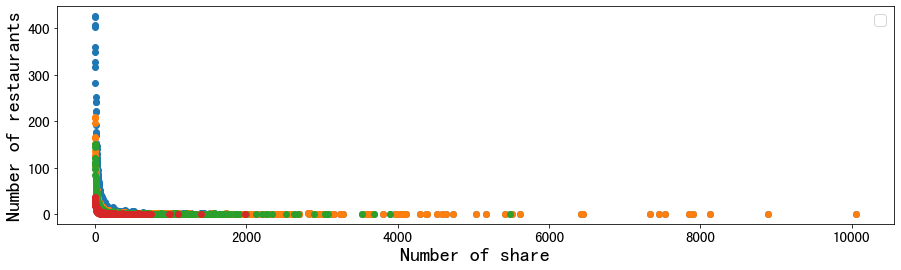

In [430]:
plt.figure(figsize=(15,4))
plt.scatter(x0, y0, marker='o')
plt.scatter(x1, y1, marker='o')
plt.scatter(x2, y2, marker='o')
plt.scatter(x4, y4, marker='o')

plt.xlabel('Number of share',fontsize=20)
plt.ylabel('Number of restaurants',fontsize=20)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.show()

In [431]:
link2['CITY'].value_counts().values

array([11508,  8476,  2242,  1054,   768,   547,   424,   417,   396,
         359,   357,   347,   233,   229,   227,   205,   157,   143,
         137,   119,    84,    73,    70,    51,    49,    44,    44,
          42,    31,    29,    25,    24,    24,    24,    24,    22,
          18,    17,    14,    12,     8,     7,     7,     7,     7,
           6,     6,     5,     5,     5,     5,     4,     4,     4,
           4,     4,     4,     4,     4,     4,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1])

In [432]:
def get_city_cost_mean(city):
    t = cost_link[cost_link['CITY']==city]['COST'].mean()
    return t
    

In [433]:
low3040city =  cost_link['CITY'].value_counts().index[100:110]
low3040 = cost_link['CITY'].value_counts().values[100:110]
low3040_cost = []
for i in low3040city:
    t = get_city_cost_mean(i)
    low3040_cost.append(t)
# link['CITY'].value_counts().values[40:50]
low3040_cost
low3040city

Int64Index([140, 97, 61, 277, 36, 246, 177, 167, 213, 80], dtype='int64')

In [434]:
link2['CITY'].value_counts().index

Int64Index([  1,   2,   4,  10,   5,   3,   7,   6,  17,  16,   8,  18,  21,
             19,  13,  22,  15,   9,  70,  79,  11, 341, 160, 344,  14,  12,
            110, 345, 267,  35, 342, 134, 279, 206,  24, 208, 226, 102, 258,
             93,  94, 299, 283,  26, 325,  98, 277, 101,  29,  23, 340,  96,
             46,  71, 224, 152, 162, 313, 219,  92, 104, 118,  95, 321, 343,
            107, 149, 129,  78, 225, 148,  36, 207,  31, 198, 103, 151, 220,
            204, 105, 180, 209,  63,  62, 221, 108, 145, 161, 281,  58, 212,
            153,  41,  25, 120, 111, 291, 276, 135],
           dtype='int64')

In [435]:
link.describe()

,ID,CITY,SCORE,FLAVOR,ENVIRONMENT,SERVICE,SHARE,LAT,LNG,COST,label
count,3.028700e+04,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000,30287.000000
mean,2.835406e+06,9.209595,3.292518,17.661439,14.913197,14.646515,61.694027,52.408775,138.123017,57.489847,0.714234
std,1.628768e+06,36.691848,1.241237,6.425666,6.422244,5.820239,275.216269,222.778937,214.599116,74.255052,0.451786
min,5.000000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21424.418830,63.451320,0.000000,0.000000
25%,1.926043e+06,1.000000,3.000000,17.000000,12.000000,13.000000,0.000000,31.193195,116.368200,20.000000,0.000000
50%,2.718745e+06,2.000000,4.000000,19.000000,15.000000,15.000000,0.000000,31.281000,118.790310,43.000000,1.000000
75%,4.207074e+06,4.000000,4.000000,21.000000,19.000000,18.000000,26.000000,39.908930,121.457695,66.000000,1.000000
max,5.600600e+06,345.000000,5.000000,32.000000,33.000000,34.000000,10054.000000,1000.000000,21489.752830,2916.000000,1.000000


In [436]:
#### 消费 , 更高的人均消费，更低的倒闭率
top5_city = cost_link['CITY'].value_counts().index[:10]
top5 = cost_link['CITY'].value_counts().values[:10]
mid5_city = cost_link['CITY'].value_counts().index[40:50]
mid5 = cost_link['CITY'].value_counts().values[40:50]
low5_city = cost_link['CITY'].value_counts().index[100:110]
low5 = cost_link['CITY'].value_counts().values[100:110]
top5_cost = []
for i in top5_city:
    t = get_city_cost_mean(i)
    top5_cost.append(t)

low5_cost = []
for i in low5_city:
    t = get_city_cost_mean(i)
    low5_cost.append(t)
mid5_cost = []
for i in mid5_city:
    t = get_city_cost_mean(i)
    mid5_cost.append(t)

In [437]:
get_city_cost_mean(343)

101.76859504132231

In [438]:
def get_city_cost_mean(city):
    t = cost_link[cost_link['CITY']==city]['COST'].mean()
    return t
    

In [439]:
cost_average = [48.486625,48.486625,48.486625,48.486625,48.486625,48.486625,48.486625,48.486625,48.486625,48.486625]

In [440]:
cost_link = df1[df1['COST']>=8]

In [441]:
cost_link.describe()

,ID,CITY,SCORE,FLAVOR,ENVIRONMENT,SERVICE,SHARE,LAT,LNG,COST
count,1.006090e+05,100609.000000,100609.000000,100609.000000,100609.000000,100609.000000,100609.000000,100609.000000,100609.000000,100609.000000
mean,2.792831e+06,31.365951,2.746976,14.798845,12.341301,12.221879,23.360763,72.092205,156.463259,50.798139
std,1.404474e+06,70.917276,1.495345,7.772882,7.059128,6.681188,158.785527,281.405953,268.756064,62.421007
min,5.000000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21428.244800,63.451320,8.000000
25%,2.045035e+06,2.000000,2.000000,14.000000,11.000000,11.000000,0.000000,30.646230,114.546640,21.000000
50%,2.707519e+06,5.000000,3.000000,17.000000,14.000000,14.000000,0.000000,31.410160,117.270500,38.000000
75%,3.918151e+06,17.000000,4.000000,20.000000,16.000000,16.000000,5.000000,39.889900,121.439640,57.000000
max,5.595244e+06,407.000000,5.000000,32.000000,33.000000,34.000000,10054.000000,1000.000000,21489.873760,2916.000000


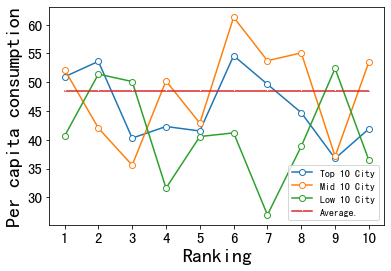

In [465]:
# plt.figure(figsize=(8,6))
X0 = ['1','2','3','4','5','6','7','8','9','10']
plt.plot(X0, top5_cost, marker='o',mfc='w',label="Top 10 City")
plt.plot(X0, mid5_cost, marker='o',mfc='w',label="Mid 10 City")
plt.plot(X0, low5_cost, marker='o',mfc='w',label="Low 10 City")
plt.plot(X0, cost_average, marker=',',mfc='w',label="Average.")
plt.xlabel('Ranking',fontsize=20)
plt.ylabel('Per capita consumption',fontsize=20)

# def to_percent(temp, position):
#     return '%1.0f'%(100*temp) + '%'
# plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.legend(fontsize=10)

plt.savefig("figure/dianping_city.png",dpi=600)
plt.show()

In [443]:
def city_close(city):
    close = 1 - link[link['CITY']==city]['label'].mean()
    return close

In [444]:
top10_close_city = link['CITY'].value_counts().index[:10]
top10_close = link['CITY'].value_counts().values[:10]
t3040_close_city = link['CITY'].value_counts().index[29:39]
t3040_close = link['CITY'].value_counts().values[29:39]

top10_close_rate = []
low10_close_rate = []
for i in top10_close_city:
    top10_close_rate.append(city_close(i))
for i in t3040_close_city:
    low10_close_rate.append(city_close(i))

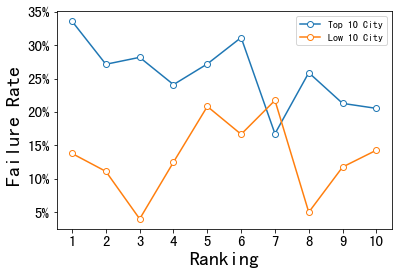

In [464]:
# plt.figure(figsize=(8,6))
X0 = ['1','2','3','4','5','6','7','8','9','10']
close_average = [0.28576,0.28576,0.28576,0.28576,0.28576,0.28576,0.28576,0.28576,0.28576,0.28576]
plt.plot(X0, top10_close_rate, marker='o',mfc='w',label="Top 10 City")
plt.plot(X0, low10_close_rate, marker='o',mfc='w',label="Low 10 City")
plt.xlabel('Ranking',fontsize=20)
plt.ylabel('Failure Rate ',fontsize=20)

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.legend(fontsize=10)
plt.savefig("figure/dianping_city_failure.png",dpi=600)
plt.show()

In [446]:
1 - link['label'].mean()

0.2857661703040909

In [447]:
top10_close_city = link['CITY'].value_counts().index[:10]
top10_ = link['CITY'].value_counts().values[:10]
t3040_city = link['CITY'].value_counts().index[30:40]
t3040 = link['CITY'].value_counts().values[30:40]

In [448]:
# label = pd.read_csv("/home/lx/CAML_Work/restaurant/restaurant_info/data/businesses_label.txt",sep="\t",header=None)
# category = pd.read_csv("/home/lx/DianPing Analysis/data/clean/businesses_style.txt",sep="\t",header=None)
# label.columns =['itemid','A','City','C','D','E','F','G','H','category','label']
# category.columns=['itemid','category']

In [449]:
# style = pd.read_csv("/home/lx/DianPing Analysis/data/clean/businesses_style.txt",sep="\t",header=None)
# share = pd.read_csv("/home/lx/DianPing Analysis/data/clean/businesses_share.txt",sep="\t",header=None)
# rating = pd.read_csv("/home/lx/DianPing Analysis/data/clean/businesses_rating.txt",sep="\t",header=None)
# flow = pd.read_csv("/home/lx/DianPing Analysis/data/clean/businesses_flow.txt",sep="\t",header=None)
# style.columns = ['itemid','style']
# share.columns = ['itemid','share']
# rating.columns = ['itemid','rating']
# flow.columns = ['itemid','flow']

In [450]:
# link1 = pd.merge(style,share,on='itemid')
# link2 = pd.merge(link1,rating,on='itemid')
# link3 = pd.merge(link2,flow,on='itemid')
# link3 = pd.merge(category,link3,on='itemid')

In [451]:
# link3.describe()

In [452]:
link['CITY'].value_counts().index[30:40]

Int64Index([279, 342, 134, 24, 206, 208, 226, 102, 258, 93], dtype='int64')

In [453]:
#### 失败、成功餐厅的评论数量分布
df = link2.groupby(by=['label'])
df0 = df.get_group(0)
df1 = df.get_group(1)

In [454]:
df0.describe()

,ID,CITY,SCORE,FLAVOR,ENVIRONMENT,SERVICE,SHARE,LAT,LNG,COST,label,FLOW
count,8.279000e+03,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.000000,8279.0,8279.000000
mean,3.110583e+06,5.867617,3.182268,16.847566,14.667834,14.359826,48.092765,52.466278,136.026229,56.065708,0.0,43.427105
std,1.615705e+06,25.002466,1.251815,6.294109,6.257564,5.741776,190.393657,134.387821,122.496704,73.869976,0.0,34.915848
min,5.000370e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.222810,87.588710,0.000000,0.0,1.000000
25%,2.056303e+06,1.000000,3.000000,16.000000,13.000000,13.000000,0.000000,31.198265,116.402785,22.000000,0.0,14.000000
50%,3.123958e+06,2.000000,3.500000,18.000000,15.000000,15.000000,0.000000,31.263710,120.671060,45.000000,0.0,34.000000
75%,4.523738e+06,3.000000,4.000000,20.000000,18.000000,18.000000,22.000000,39.906790,121.466295,64.000000,0.0,71.000000
max,5.595081e+06,345.000000,5.000000,29.000000,32.000000,32.000000,4111.000000,1000.000000,1000.000000,2916.000000,0.0,210.000000


In [455]:
y1 = df1.describe(percentiles=[0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.93])['FLOW'][4:24].values
y0 = df0.describe(percentiles=[0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.93])['FLOW'][4:24].values

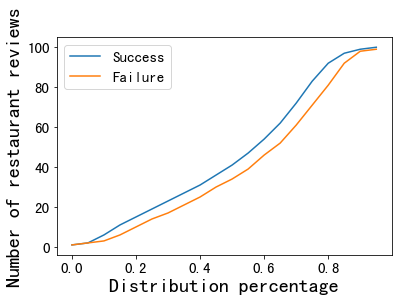

In [456]:
x = [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]
# y = [1,19,41,83]
plt.plot(x,y1,label="Success")
plt.plot(x,y0,label="Failure")
plt.xlabel('Distribution percentage',fontsize=20)
plt.ylabel('Number of restaurant reviews',fontsize=20)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.show()

# plt.savefig("figure/dianping_Distribution.png",dpi=600)

In [457]:
### 统计所有餐厅数量
df_sort_time = df.sort_values(by=['itemid','time'])[['userid','itemid','time','rate','flavor','environment','service']]

AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [ ]:
itemid = df_sort_time['itemid'].value_counts().index
count = df_sort_time['itemid'].value_counts().values
itemid_count_dict = {}
t = 0
for i in itemid:
    itemid_count_dict[i] = count[t]
    t+=1

In [ ]:
# itemid_count_dict

In [ ]:
failure = df0['ID'].values
success = df1['ID'].values

In [ ]:
def get_item_rate(itemid):
    res = df[df['itemid']==itemid]['rate'].mean()
    return res
    

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         for i in failure:
    if itemid_count_dict[i]<=5 :
        # 获取该餐厅的评论评分
        t = get_item_rate(i)

In [ ]:
df
    